# __Meshing in DFN.Lab__

### Problem statement


Solving a system of equations on a physical system requires a discretization of the objects under study. For DFN models such discretization can be achieved by meshing the fractures in the DFN.
<br>
The goal of this tutorial is thus to show how fractures in a DFN model are meshed in DFN.Lab.

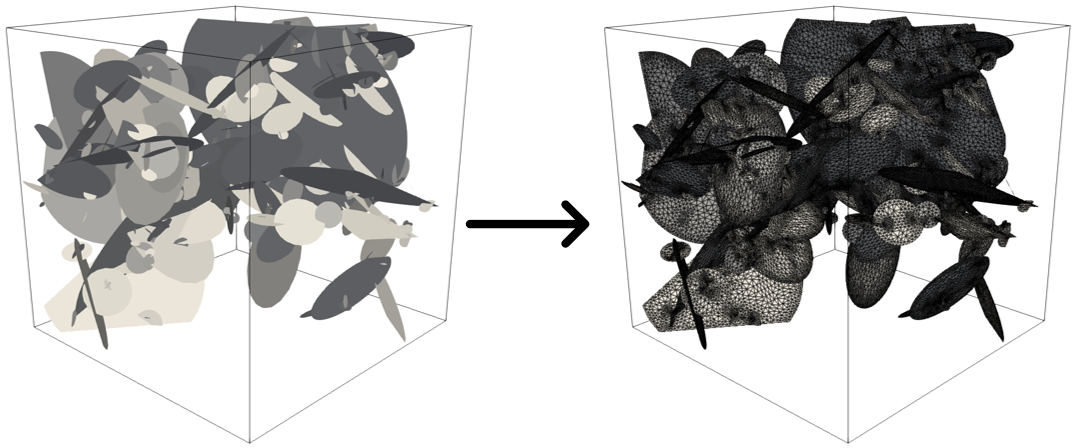

### Theoretical background

The reader is assumed to be familiar to the concept of Delaunay triangulation. We here describe some DFN.Lab-specific mesh properties.
<br>
The meshing in DFN.Lab is done using the mesher MMG2D from the [MMG platform](https://www.mmgtools.org/) software.


In DFN.Lab, a mesh consists of a set of not overlapping triangles. 
<br>
As the fractures are connected, the mesh recovers every intersection lines between fractures.
<br>
Mesh is conform at fracture intersections.
<br>
A gradation coefficient $h$ is used to make the mesh coarser away from intersection lines or fracture tips, according to the following:
<br>
Let $e_1$ and $e_2$ be two adjacent edges that do not belong to the geometry, then the mesh elements size is controlled by a gradation coefficient $h$, so that:
$$ \frac{1}{h} \leq \frac{e_1}{e_2} \leq h $$
[See the MMG documentation for more explanations](https://www.mmgtools.org/mmg-remesher-try-mmg/mmg-remesher-options/mmg-remesher-option-hgrad)

The number of elements controls the memory requirement and the computational burden. The number of elements is steered by the parameter "characteristic length". 

### What will you learn ?

- How to generate a mesh from a DFN
- Control the number elements in the mesh
- Save a mesh
- Load a mesh

### DFN.Lab model

The goal of this tutorial is to generate a mesh on fractures from a given DFN.
<br>
Since meshing isolated fractures is not necessary for flow and transport simulations, one may ensure that the DFN contains only connected fracture through backbone identification.


The required modules are __Mesh__, __Basis__ and __IO__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](sources/functions.py).

In [1]:
import dfnlab.Mesh as mesh 
import dfnlab.Basis as basis
import dfnlab.IO as io
import os 

----------------------------------------

## Example 1: Create a coarse mesh

#### Import a DFN

First, we need a _DFN_. In this example, we import a DFN from a _'*.disk'_ file. We also need to compute fracture intersections before meshing.

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet =basis.DFN(the_system)
io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk")
fnet.computeIntersections()

Let's have a look at our network.

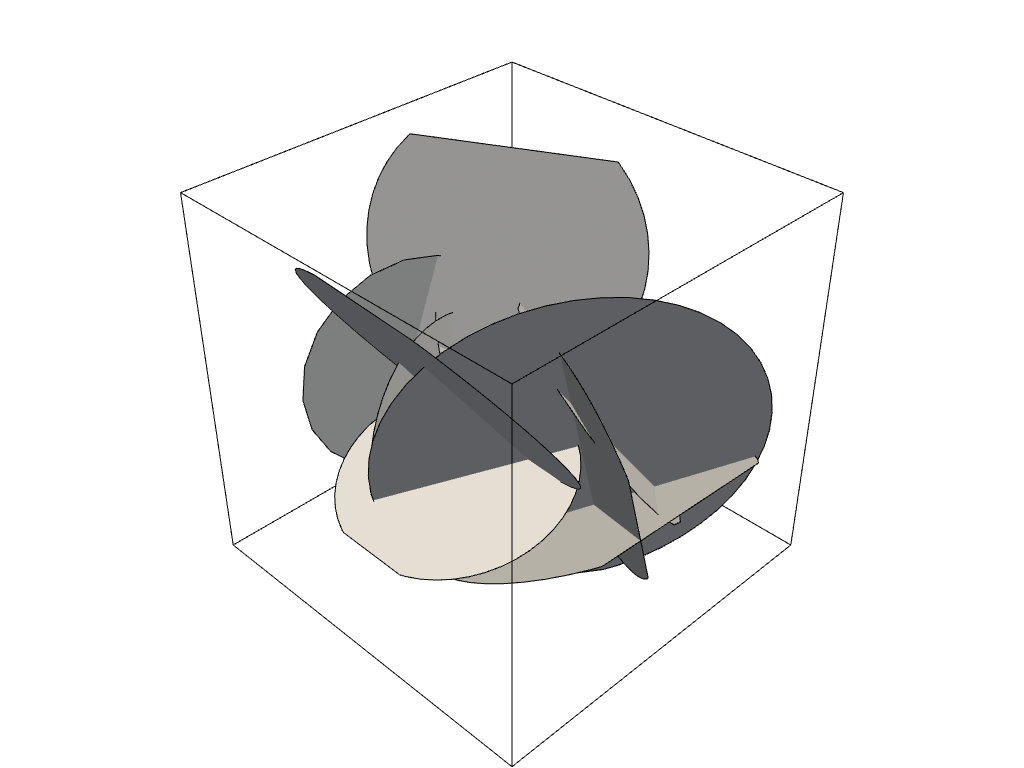

In [3]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tutoMeshing_dfn1")

#### Mesh the DFN

We need to build a _DFNMesh_ object, taking a _DFN_ as argument.

In [4]:
meshDFN = mesh.DFNMesh(fnet)  

The meshing procedure depends on a few parameters which control the number of elements of the mesh
<br>
These parameters are described below. A detailed description is also available in the documentation.

In this example, the characteristic length is $0.1$. <br/>
The gradation coefficient $h$ is set to $1.2$.

In [5]:
meshDFN.setCaracteristicLength(0.1)
meshDFN.setGradation(1.2)  

In [6]:
meshDFN.generateMesh();

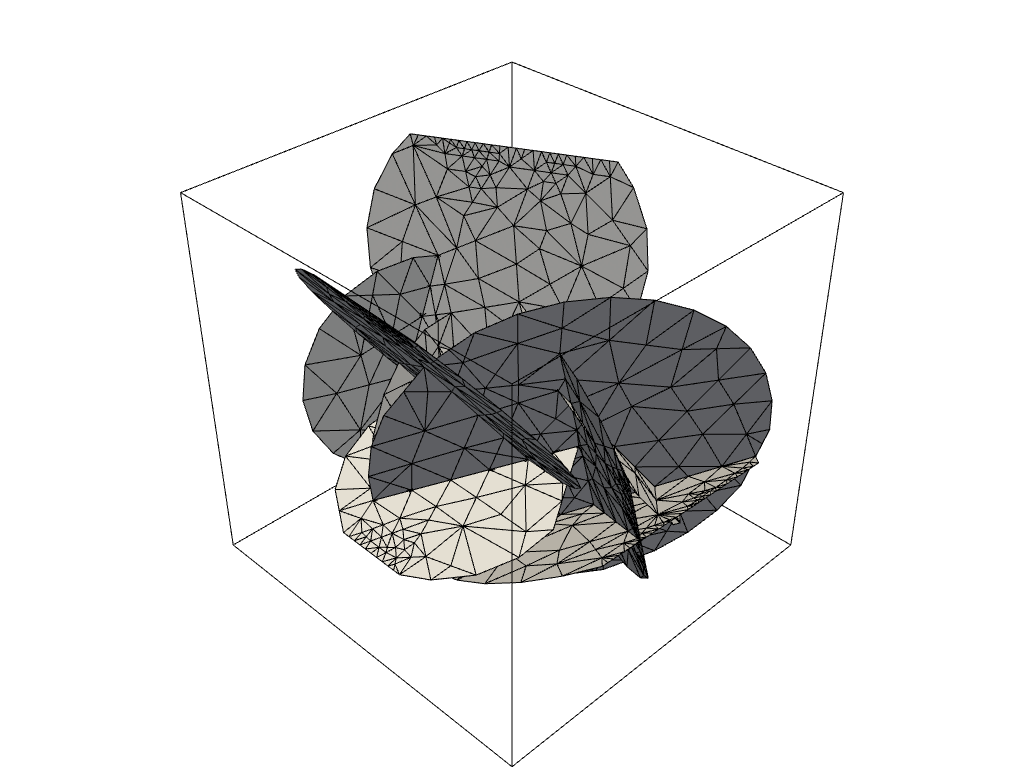

In [7]:
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
from sources.functions import plot_mesh
plot_mesh(meshDFN,pathFolder+"/tutoMeshing_Mesh1")

The number of elements is:

In [8]:
meshDFN.getNbTriangles()

2093

### Example 2: Create a fine mesh

In this example, the characteristic length is $0.02$. <br/>
The mesh will be finer on intersection lines, with a characteristic length 3 times less than the global characteristic length. <br/>
The gradation coefficient $h$ is set to $1.2$.

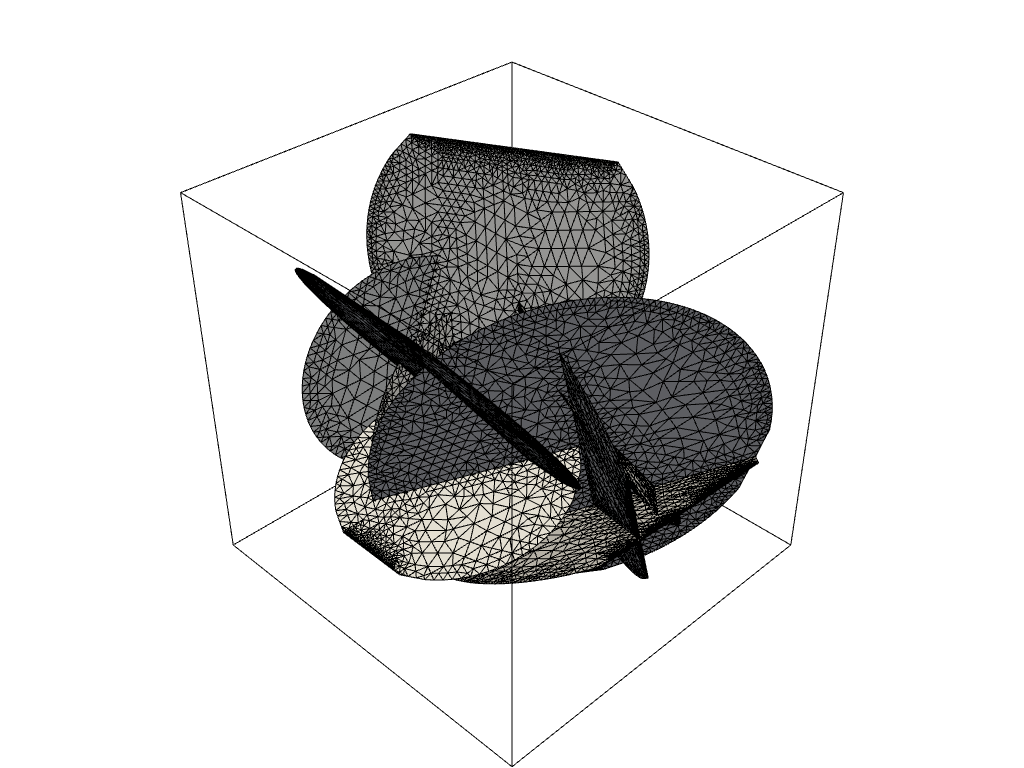

In [9]:
mesh2 = mesh.DFNMesh(fnet)  
mesh2.setCaracteristicLength(0.02)
mesh2.setResolutionIntersection(3)
mesh2.setGradation(1.2)  
mesh2.generateMesh()  

from sources.functions import plot_mesh
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
plot_mesh(mesh2,pathFolder+"/tutoMeshing_Mesh2")

The number of elements is:

In [10]:
mesh2.getNbTriangles()

21898

## Save and read a mesh

A mesh generation is a long process. We provide a way to save and restore a mesh from an existant directory

In [11]:
path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"+"/mesh/"

if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
mesh2.saveMesh(pathFolder)

To restore a mesh, we must create an empty mesh object.

In [12]:
mesh3 = mesh.DFNMesh(fnet)  
mesh3.loadMesh(pathFolder)

24


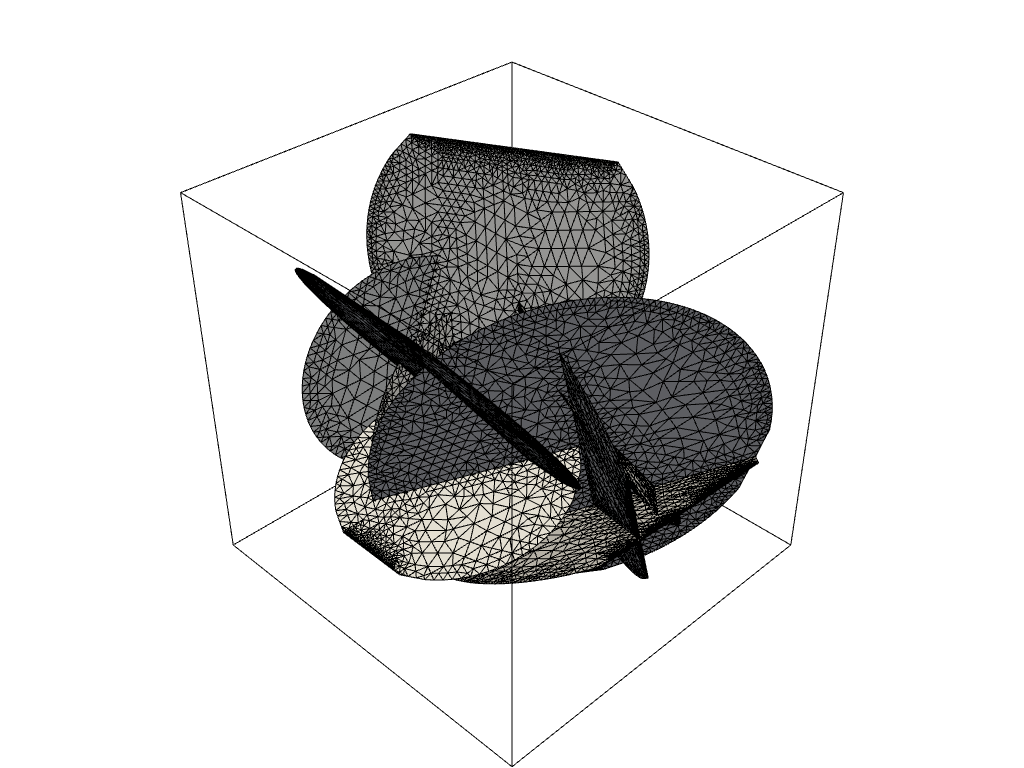

In [13]:
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
from sources.functions import plot_mesh
plot_mesh(mesh3,pathFolder+"/tutoMeshing_Mesh2")